Importing Classes..........
Class 0 imported.
Class 1 imported.


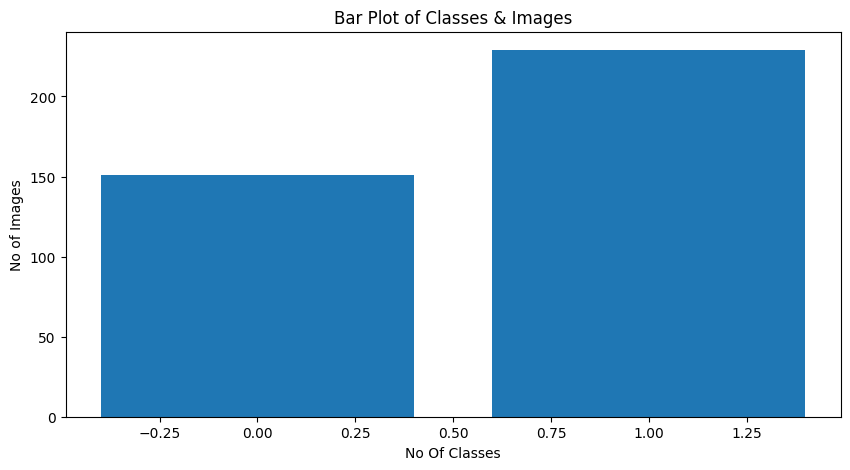

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,586 (654.63 KB)

 Trainable params: 167,586 (654.63 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/2
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 336us/step - accuracy: 0.5550 - loss: 0.6829 - val_accuracy: 0.6250 - val_loss: 0.6556
Epoch 2/2
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 183us/step - accuracy: 0.5974 - loss: 0.6646 - val_accuracy: 0.6250 - val_loss: 0.6322


In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # Import this to fix the error
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Dropout, Flatten
from keras.optimizers import Adam

########################################

path = 'images'
images = []
classNo = []
testRatio = 0.2
valRatio = 0.2
imgDimension = (32, 32, 3)

#########################################

def is_image_file(file):
    """Check if a file is a valid image file."""
    valid_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']
    return any(file.lower().endswith(ext) for ext in valid_extensions)

myList = os.listdir(path)
numOfClasses = len(myList)

print("Importing Classes..........")
for x in range(0, numOfClasses):
    myPicList = os.listdir(path + "/" + str(x))
    for y in myPicList:
        if not is_image_file(y):
            print(f"Skipping non-image file: {path}/{x}/{y}")
            continue

        img_path = path + "/" + str(x) + "/" + y
        curImg = cv2.imread(img_path)
        
        if curImg is None:
            print(f"Error: Unable to load image {img_path}. Skipping.")
            continue
        
        curImg = cv2.resize(curImg, (imgDimension[0], imgDimension[1]))
        images.append(curImg)
        classNo.append(x)
    print(f"Class {x} imported.")

images = np.array(images)
classNo = np.array(classNo)

######### Spliting The Data ###########
x_train, x_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=valRatio)


# # print(x_train.shape)

numOfSample=[]

for x in range(0,numOfClasses):
	numOfSample.append(len(np.where(y_train==x)[0]))


plt.figure(figsize=(10,5))
plt.bar(range(0, numOfClasses),numOfSample)
plt.title("Bar Plot of Classes & Images")
plt.xlabel("No Of Classes")
plt.ylabel("No of Images")
plt.show()


def preprocessing(img):
	# img=np.astype("uint8")
	img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
	img=cv2.equalizeHist(img)
	img=img/255
	return img


x_train=np.array(list(map(preprocessing, x_train)))
x_test=np.array(list(map(preprocessing, x_test)))
x_validation=np.array(list(map(preprocessing, x_validation)))


x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2],1)
x_test=x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)
x_validation=x_validation.reshape(x_validation.shape[0], x_validation.shape[1], x_validation.shape[2],1)


dataGen=ImageDataGenerator(
	width_shift_range=0.1,
	height_shift_range=0.1,
	zoom_range=0.2,
	shear_range=0.1,
	rotation_range=10)

dataGen.fit(x_train)

y_train=to_categorical(y_train, numOfClasses)
y_test=to_categorical(y_test, numOfClasses)
y_validation=to_categorical(y_validation, numOfClasses)


def myModel():
	sizeOfFilter1=(3,3)
	sizeOfFilter2=(3,3)
	sizeOfPool=(2,2)

	model=Sequential()
	model.add((Conv2D(32, sizeOfFilter1, input_shape=(imgDimension[0],imgDimension[1],1),activation='relu')))
	model.add((Conv2D(32, sizeOfFilter1,activation='relu')))
	model.add(MaxPooling2D(pool_size=sizeOfPool))

	model.add((Conv2D(64, sizeOfFilter2,activation='relu')))
	model.add((Conv2D(64, sizeOfFilter2,activation='relu')))
	model.add(MaxPooling2D(pool_size=sizeOfPool))
	model.add(Dropout(0.5))


	model.add(Flatten())
	model.add(Dense(64, activation='relu'))
	model.add(Dropout(0.5))
	model.add(Dense(numOfClasses, activation='softmax'))
	model.compile(Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
	return model

model=myModel()
print(model.summary())

history=model.fit(dataGen.flow(x_train, y_train,batch_size=50),
	steps_per_epoch=1000,
	epochs=2,
	validation_data=(x_validation,y_validation),
	shuffle=1)

model.save("MyTrainingModel.h5")

In [9]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy*100:.2f}%')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6775 - loss: 0.6255
Test accuracy: 64.17%


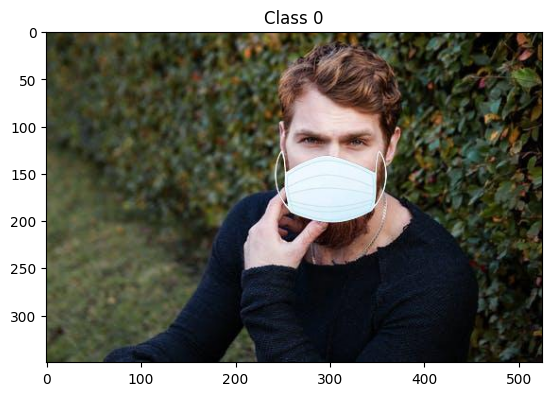

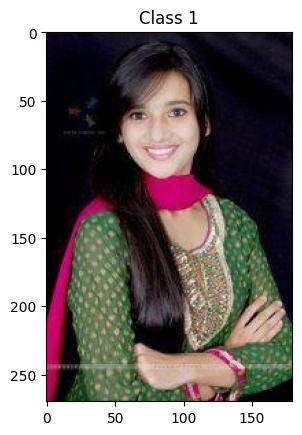

In [2]:
# Verify the labels of images
import matplotlib.pyplot as plt

path = 'images'
myList = os.listdir(path)
numOfClasses = len(myList)

for x in range(numOfClasses):
    myPicList = os.listdir(path + "/" + str(x))
    for y in myPicList:
        img_path = path + "/" + str(x) + "/" + y
        img = cv2.imread(img_path)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f'Class {x}')
        plt.show()
        break  # Display one example per class to verify


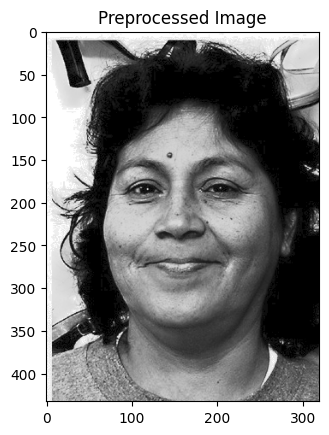

In [5]:
# Verify preprocessing on an example image
img_path = 'images/1/102.jpg'
img = cv2.imread(img_path)

def preprocessing(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    img = img.astype(np.float32) / 255.0
    return img

preprocessed_img = preprocessing(img)
plt.imshow(preprocessed_img)
plt.title('Preprocessed Image')
plt.show()


In [10]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import cv2
from keras.models import load_model
import matplotlib.pyplot as plt

# Function to preprocess and predict mask
def preprocessing(img):
    if img is None:
        raise ValueError("Image not loaded correctly. Please check the file path.")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    img = img.astype(np.float32) / 255.0
    return img

# Load the model
model = load_model('my_model.keras')

# Test images
test_images = [ 'images/0/107-with-mask.jpg','images/1/105.jpg',]  # Replace with paths to your test images

for img_path in test_images:
    img = cv2.imread(img_path)
    if img is None:
        print(f"Failed to load image: {img_path}. Skipping this image.")
        continue
    
    try:
        preprocessed_img = preprocessing(img)
        preprocessed_img = preprocessed_img.reshape(1, 32, 32, 3)
        
        prediction = model.predict(preprocessed_img)
        classIndex = np.argmax(prediction, axis=1)[0]
        probabilityValue = np.amax(prediction)
        
        label = "Mask" if classIndex == 0 else "No Mask"
        print(f'Image: {img_path}, Prediction: {label}, Probability: {probabilityValue}')
        
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f'Prediction: {label} ({probabilityValue*100:.2f}%)')
        plt.show()
    except ValueError as e:
        print(e)


cannot reshape array of size 415680 into shape (1,32,32,3)
cannot reshape array of size 156648 into shape (1,32,32,3)


Preprocessed image shape: (32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
Image: images/0/107-with-mask.jpg, Prediction: Mask, Probability: 0.999915599822998


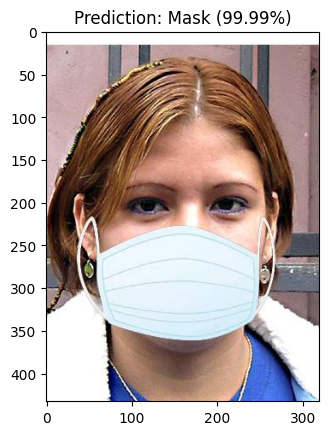

Preprocessed image shape: (32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Image: images/1/105.jpg, Prediction: No Mask, Probability: 0.9960773587226868


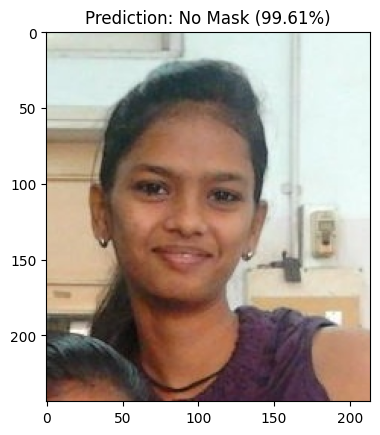

In [11]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import cv2
from keras.models import load_model
import matplotlib.pyplot as plt

# Function to preprocess and predict mask
def preprocessing(img):
    if img is None:
        raise ValueError("Image not loaded correctly. Please check the file path.")
    img = cv2.resize(img, (32, 32))  # Resize to expected dimensions
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    img = img.astype(np.float32) / 255.0
    return img

# Load the model
model = load_model('my_model.keras')

# Test images
test_images = ['images/0/107-with-mask.jpg', 'images/1/105.jpg']  # Replace with paths to your test images

for img_path in test_images:
    img = cv2.imread(img_path)
    if img is None:
        print(f"Failed to load image: {img_path}. Skipping this image.")
        continue
    
    try:
        preprocessed_img = preprocessing(img)
        print(f'Preprocessed image shape: {preprocessed_img.shape}')  # Debug print
        preprocessed_img = preprocessed_img.reshape(1, 32, 32, 3)
        
        prediction = model.predict(preprocessed_img)
        classIndex = np.argmax(prediction, axis=1)[0]
        probabilityValue = np.amax(prediction)
        
        label = "Mask" if classIndex == 0 else "No Mask"
        print(f'Image: {img_path}, Prediction: {label}, Probability: {probabilityValue}')
        
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f'Prediction: {label} ({probabilityValue*100:.2f}%)')
        plt.show()
    except ValueError as e:
        print(e)


Verifying dataset...


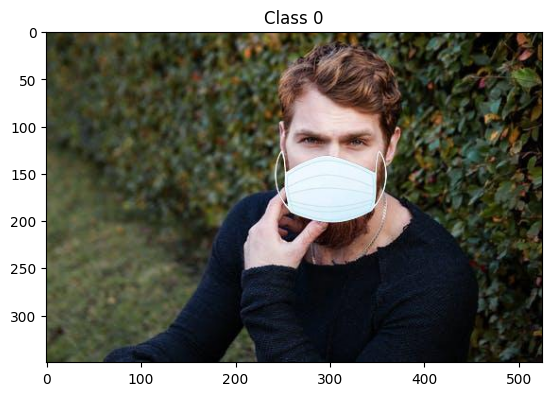

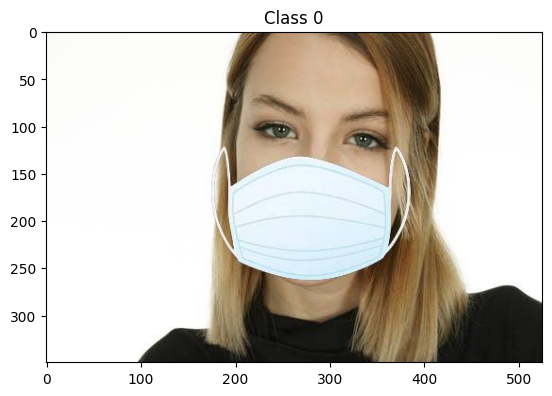

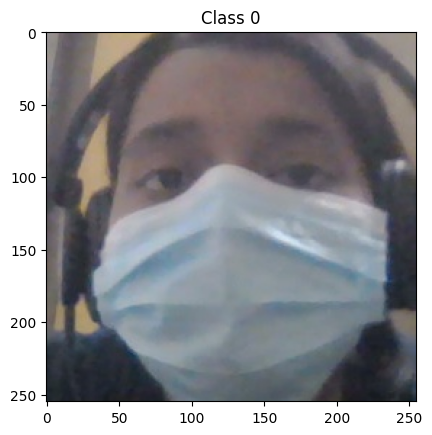

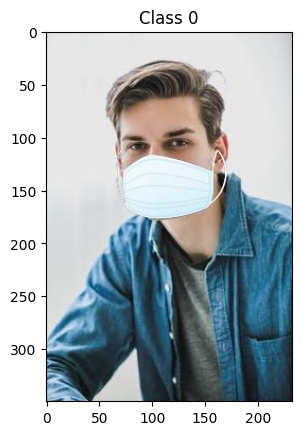

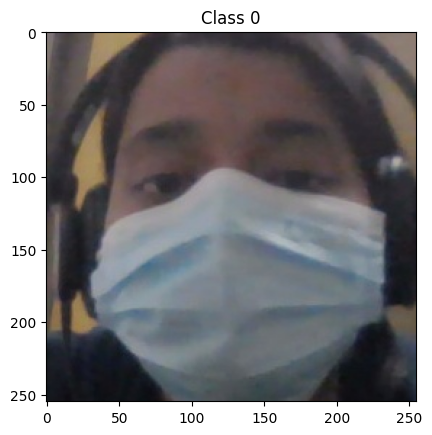

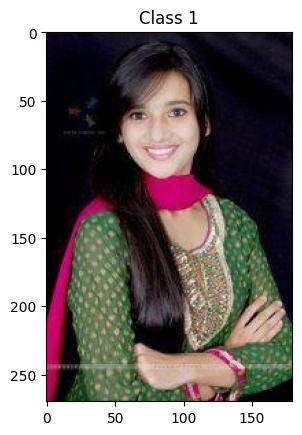

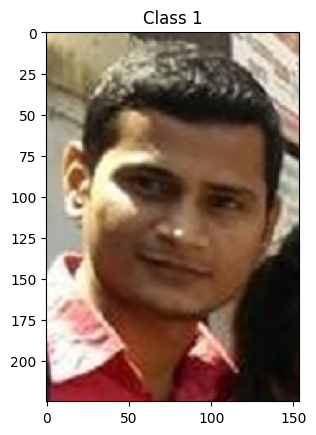

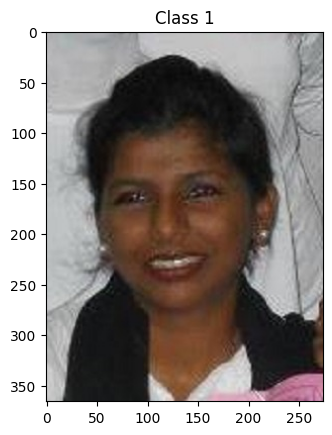

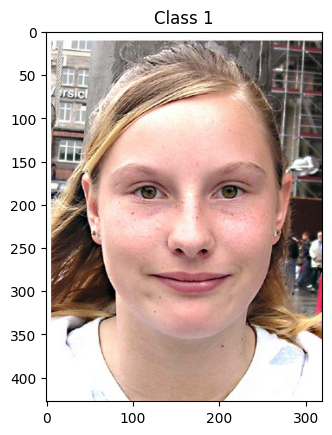

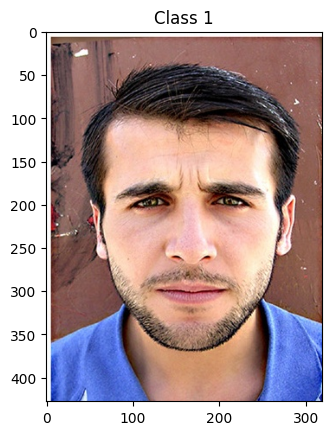

In [19]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Verify data collection and labels
path = 'images'
numOfClasses = len(os.listdir(path))

def is_image_file(file):
    valid_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']
    return any(file.lower().endswith(ext) for ext in valid_extensions)

print("Verifying dataset...")
for cls in range(numOfClasses):
    class_path = os.path.join(path, str(cls))
    images = [f for f in os.listdir(class_path) if is_image_file(f)]
    for img_file in images[:5]:  # Show first 5 images of each class
        img_path = os.path.join(class_path, img_file)
        img = cv2.imread(img_path)
        if img is not None:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title(f'Class {cls}')
            plt.show()
        else:
            print(f"Failed to load image: {img_path}")


In [20]:
import cv2

# Verify face detection on different faces
facedetect = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(0)

while True:
    success, frame = cap.read()
    if not success:
        break
    faces = facedetect.detectMultiScale(frame, 1.1, 4)
    for x, y, w, h in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    cv2.imshow("Face Detection", frame)
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [22]:
import cv2
import numpy as np

# Function to preprocess image
def preprocessing(img):
    if img is None:
        raise ValueError("Image not loaded correctly.")
    img = cv2.resize(img, (32, 32))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    img = img.astype(np.float32) / 255.0
    return img

# Test preprocessing
img_path = 'images/0/10-with-mask.jpg'
img = cv2.imread(img_path)
preprocessed_img = preprocessing(img)
print(preprocessed_img.shape)


(32, 32, 3)


Importing Classes..........
Class 0 imported.
Class 1 imported.


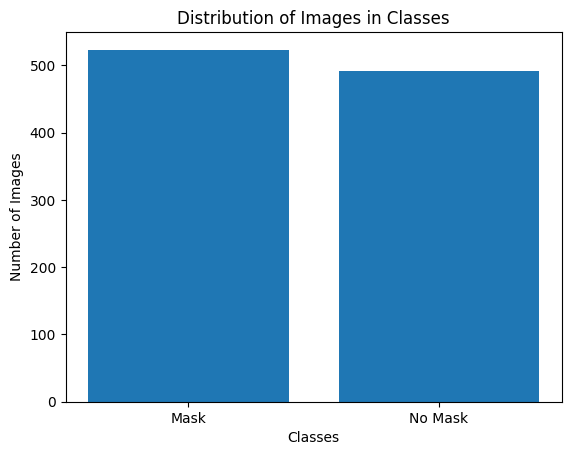

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.5677 - loss: 0.6420 - val_accuracy: 0.9571 - val_loss: 0.3325
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9323 - loss: 0.2306 - val_accuracy: 0.9632 - val_loss: 0.1001
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9633 - loss: 0.1188 - val_accuracy: 0.9755 - val_loss: 0.0708
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9696 - loss: 0.0997 - val_accuracy: 0.9632 - val_loss: 0.0747
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9757 - loss: 0.0812 - val_accuracy: 0.9693 - val_loss: 0.0691
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9768 - loss: 0.0737 - val_accuracy: 0.9325 - val_loss: 0.1825
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9497 - loss: 0.1324 - val_accuracy: 0.9755 - val_loss: 0.0617
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9852 - loss: 0.0560 - val_accuracy: 0.9693 - v

In [24]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import cv2
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define paths and parameters
path = 'images'
imgDimension = (32, 32, 3)
testRatio = 0.2
valRatio = 0.2

# Initialize data arrays
images = []
classNo = []
class_counts = []

def is_image_file(file):
    valid_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']
    return any(file.lower().endswith(ext) for ext in valid_extensions)

# Load and preprocess the dataset
print("Importing Classes..........")
myList = os.listdir(path)
numOfClasses = len(myList)
for x in range(numOfClasses):
    myPicList = os.listdir(path + "/" + str(x))
    class_counts.append(len(myPicList))
    for y in myPicList:
        if not is_image_file(y):
            continue
        img_path = path + "/" + str(x) + "/" + y
        curImg = cv2.imread(img_path)
        if curImg is None:
            continue
        curImg = cv2.resize(curImg, (imgDimension[0], imgDimension[1]))
        images.append(curImg)
        classNo.append(x)
    print(f"Class {x} imported.")

# Convert lists to numpy arrays
images = np.array([img for img in images if img is not None])
classNo = np.array(classNo)

# Plot the distribution of images across classes
plt.bar(range(numOfClasses), class_counts, tick_label=['Mask', 'No Mask'])
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Distribution of Images in Classes')
plt.show()

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=valRatio)

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0

# Convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes=numOfClasses)
y_test = to_categorical(y_test, num_classes=numOfClasses)
y_val = to_categorical(y_val, num_classes=numOfClasses)

# Define and compile the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(numOfClasses, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with more epochs
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy*100:.2f}%')

# Save the model
model.save('my_model.keras')


In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import cv2
from keras.models import load_model

# Function to preprocess and predict mask
def preprocessing(img):
    if img is None:
        raise ValueError("Image not loaded correctly.")
    img = cv2.resize(img, (32, 32))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    img = img.astype(np.float32) / 255.0
    return img

def get_className(classNo):
    return "Mask" if classNo == 0 else "No Mask"

def predict_mask(img, model):
    img = preprocessing(img)
    img = img.reshape(1, 32, 32, 3)
    prediction = model.predict(img)
    classIndex = np.argmax(prediction, axis=1)[0]
    probabilityValue = np.amax(prediction)
    return classIndex, probabilityValue

# Load the model
model = load_model('my_model.keras')

# Real-time mask detection
facedetect = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(0)  # Open the default webcam
cap.set(3, 640)  # Set frame width
cap.set(4, 480)  # Set frame height
font = cv2.FONT_HERSHEY_COMPLEX

while True:
    success, imgOriginal = cap.read()
    if not success:q
        break
    
    faces = facedetect.detectMultiScale(imgOriginal, 1.1, 4)
    for x, y, w, h in faces:
        crop_img = imgOriginal[y:y+h, x:x+w]
        classIndex, probabilityValue = predict_mask(crop_img, model)
        if probabilityValue > 0.9:  # Use the defined threshold
            color = (0, 255, 0) if classIndex == 0 else (50, 50, 255)
            cv2.rectangle(imgOriginal, (x, y), (x+w, y+h), color, 2)
            cv2.rectangle(imgOriginal, (x, y-40), (x+w, y), color, -2)
            cv2.putText(imgOriginal, str(get_className(classIndex)), (x, y-10), font, 0.75, (255, 255, 255), 1, cv2.LINE_AA)

    cv2.imshow("Result", imgOriginal)
    if cv2.waitKey(1) == ord('q'):  # Press 'q' to quit
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━